C:\Users\14198\anaconda3\envs\Yingwen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\14198\anaconda3\envs\Yingwen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\14198\anaconda3\envs\Yingwen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\14198\anaconda3\envs\Yingwen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

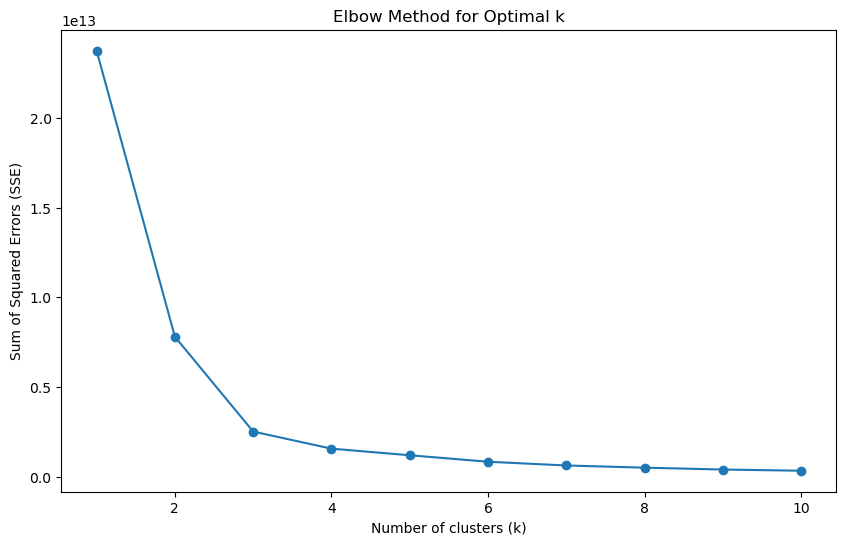

In [4]:
# K-means, K-means++, DBSCAN, OPTICS, hierarchical clustering(Agglomerative & Divisive)

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Read data from excel 
data = pd.read_excel('Dry_Bean_Dataset.xlsx')
X = data.drop(columns = ['Class'])
y = data['Class']

# Use mapping for the labels
y = y.map({'SEKER': 0, 'BARBUNYA': 1, 'BOMBAY': 2, 'CALI': 3, 'HOROZ': 4, 'SIRA': 5, 'DERMASON': 6})

# 绘制肘部图
# 计算不同k值下的SSE（平方误差和）
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()

# It is surprised to see that the elbow is near position k=3

In [17]:
# KMeans++ clustering
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

labels0 = kmeans.labels_

C:\Users\14198\anaconda3\envs\Yingwen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
from sklearn.metrics import (
    adjusted_rand_score,
    fowlkes_mallows_score,
    adjusted_mutual_info_score,
    v_measure_score,
    silhouette_score,
    calinski_harabasz_score,
    davies_bouldin_score
)
#  Purity
def purity(y_true, y_pred):
    unique_true = np.unique(y_true)
    unique_pred = np.unique(y_pred)
    cont = np.zeros((len(unique_true), len(unique_pred)), dtype=int)
    # row is groundtruth label, col is cluster
    
    true_to_idx = {v: i for i, v in enumerate(unique_true)}
    pred_to_idx = {v: j for j, v in enumerate(unique_pred)}
    
    for t, p in zip(y_true, y_pred):
        cont[true_to_idx[t], pred_to_idx[p]] += 1
    
    max_per_col = np.max(cont, axis=0) # get the maximum per cluster
    total = np.sum(cont)
    # Complete the current function
    return np.sum(max_per_col)/total

true_labels = y
cluster_labels = labels0
# X = X.values  # 特征矩阵

# 外部指标（需要真实标签）
print(f"purity: {purity(true_labels, cluster_labels)}")
print(f"sklearn ARI: {adjusted_rand_score(true_labels, cluster_labels)}")
print(f"sklearn FMI: {fowlkes_mallows_score(true_labels, cluster_labels)}")
print(f"sklearn AMI: {adjusted_mutual_info_score(true_labels, cluster_labels)}")
print(f"sklearn v_measure: {v_measure_score(true_labels, cluster_labels)}")

# 内部指标（不需要真实标签）
print(f"sklearn silhouette: {silhouette_score(X, cluster_labels)}")
print(f"sklearn calinski_harabaz: {calinski_harabasz_score(X, cluster_labels)}")
print(f"sklearn davies_bouldin: {davies_bouldin_score(X, cluster_labels)}")

# 聚类结果在几何结构上是清晰有效的（内部指标好），
# 但在对真实标签的还原上表现一般（外部指标中等）。
# 这可能是因为：KMeans++ 能很好地把数据划分成几组，但这些分组和真实分类的定义（比如类别间非线性关系）不完全一致。

purity: 0.5895231797810594
sklearn ARI: 0.3876001578046273
sklearn FMI: 0.5101765229198804
sklearn AMI: 0.5145106755729758
sklearn v_measure: 0.5148814482419842
sklearn silhouette: 0.5340255551090752
sklearn calinski_harabaz: 85278.3502893548
sklearn davies_bouldin: 0.5721812227409817


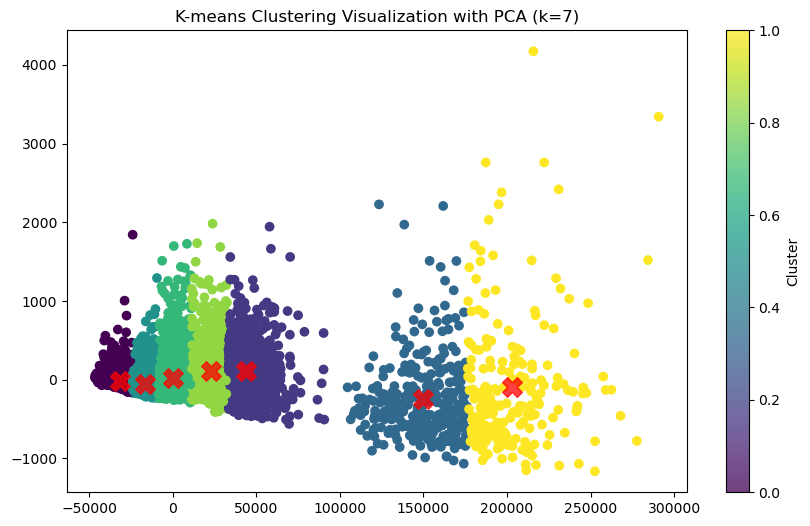

In [22]:
# 使用PCA将数据降维可视化
from sklearn.decomposition import PCA

# 降维到2D
X_pca = PCA(n_components=2).fit_transform(X)

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels0, cmap='viridis')

# 聚类中心也降维（注意：要对原始 cluster centers 用相同 PCA 降维）
centers_pca = PCA(n_components=2).fit(X).transform(kmeans.cluster_centers_)

plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering Visualization with PCA (k=7)")
plt.colorbar(label='Cluster')
plt.show()


In [23]:
# kmeans clustering
kmeans1 = KMeans(n_clusters=7, init = "random", random_state=42)
kmeans1.fit(X)

labels1 = kmeans1.labels_
true_labels = y
cluster_labels = labels1
# X = X.values  # 特征矩阵

# 外部指标（需要真实标签）
print(f"purity: {purity(true_labels, cluster_labels)}")
print(f"sklearn ARI: {adjusted_rand_score(true_labels, cluster_labels)}")
print(f"sklearn FMI: {fowlkes_mallows_score(true_labels, cluster_labels)}")
print(f"sklearn AMI: {adjusted_mutual_info_score(true_labels, cluster_labels)}")
print(f"sklearn v_measure: {v_measure_score(true_labels, cluster_labels)}")

# 内部指标（不需要真实标签）
print(f"sklearn silhouette: {silhouette_score(X, cluster_labels)}")
print(f"sklearn calinski_harabaz: {calinski_harabasz_score(X, cluster_labels)}")
print(f"sklearn davies_bouldin: {davies_bouldin_score(X, cluster_labels)}")

C:\Users\14198\anaconda3\envs\Yingwen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


purity: 0.601498787745206
sklearn ARI: 0.366831677516763
sklearn FMI: 0.4799179044824155
sklearn AMI: 0.5209855440878861
sklearn v_measure: 0.521335403599659
sklearn silhouette: 0.54195318826344
sklearn calinski_harabaz: 60948.011602717655
sklearn davies_bouldin: 0.49739266878677546


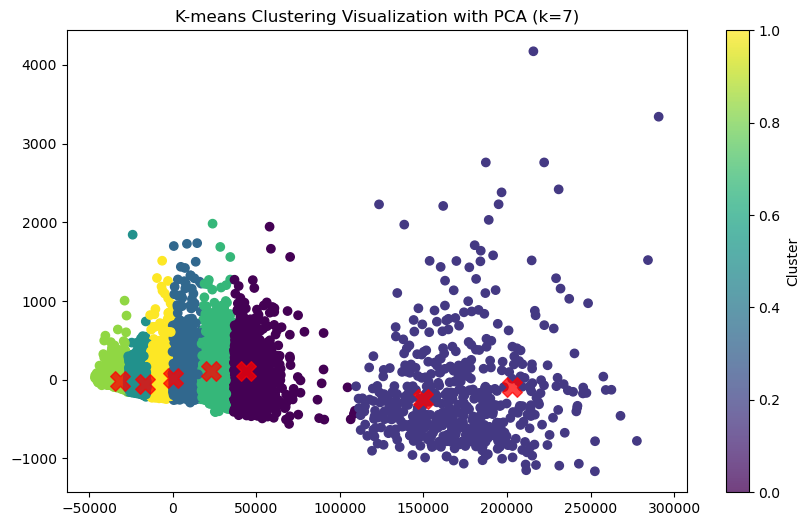

In [25]:
# 使用PCA将数据降维可视化
from sklearn.decomposition import PCA

# 降维到2D
X_pca = PCA(n_components=2).fit_transform(X)

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels1, cmap='viridis')

# 聚类中心也降维（注意：要对原始 cluster centers 用相同 PCA 降维）
centers_pca = PCA(n_components=2).fit(X).transform(kmeans.cluster_centers_)

plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title("K-means Clustering Visualization with PCA (k=7)")
plt.colorbar(label='Cluster')
plt.show()


C:\Users\14198\anaconda3\envs\Yingwen\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


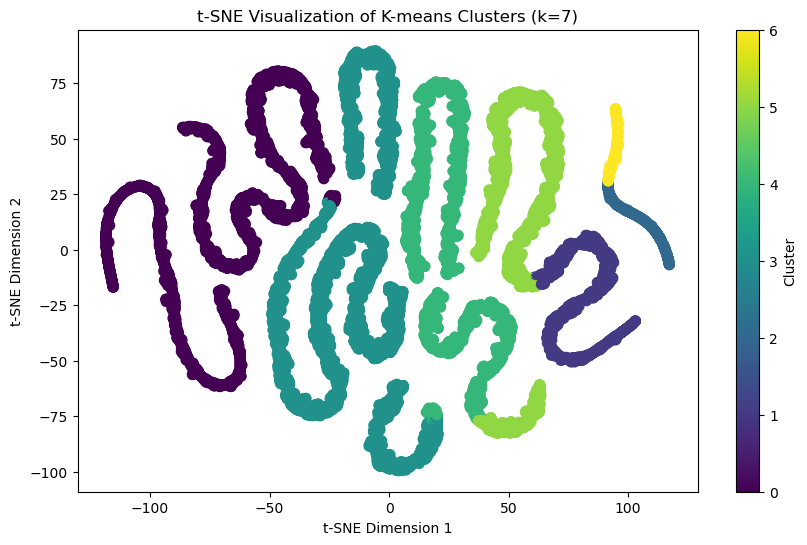

In [21]:
# 将数据聚类后使用t-SNE进行可视化
# 可惜什么都看不出来
from sklearn.manifold import TSNE
k = 7
kmeans_tsne = KMeans(n_clusters=k, random_state=42)
kmeans_tsne.fit(X)
labels = kmeans_tsne.labels_

# t-SNE降维到2维
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

# 将聚类标签加入DataFrame
data['cluster'] = labels
data['tsne-1'] = X_tsne[:, 0]
data['tsne-2'] = X_tsne[:, 1]

# 可视化
plt.figure(figsize=(10, 6))
plt.scatter(data['tsne-1'], data['tsne-2'], c=data['cluster'], cmap='viridis', s=50)
plt.title("t-SNE Visualization of K-means Clusters (k=7)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.colorbar(label='Cluster')
plt.show()